In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.style.use("aslak")

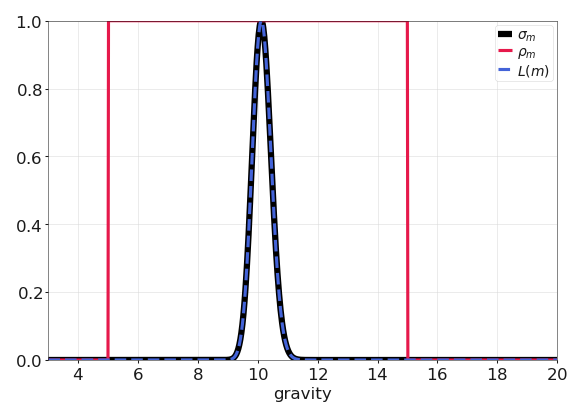

In [22]:
# exercise 1: tower drop

towerheights = np.array([56, 40, 23, 70, 22])
d_obs = np.array([3.3, 2.75, 2.2, 3.8, 2])
sigma_d = 0.1


def forward_model(m):
    return np.sqrt(2 * towerheights / m)


def rho_m(m):
    return ((m >= 5) & (m <= 15)) * 1.0


def rho_d(d):
    p = norm(d_obs, 0.1).pdf(d)
    return np.prod(p)


def likelihood(m):
    return rho_d(forward_model(m))


m = np.linspace(3, 20, 1000)
prior_m = np.empty_like(m)
L_m = np.empty_like(m)
for i in range(len(m)):
    prior_m[i] = rho_m(m[i])
    L_m[i] = likelihood(m[i])
post_m = prior_m * L_m
plt.plot(m, post_m / np.max(post_m), "k", label="$\\sigma_m$", lw=3)
plt.plot(m, prior_m / np.max(prior_m), label="$\\rho_m$")
plt.plot(m, L_m / np.max(L_m), "--", label="$L(m)$")
plt.xlabel("gravity")
plt.legend()

ex1result = [m, post_m]

IndexError: GridSpec slice would result in no space allocated for subplot

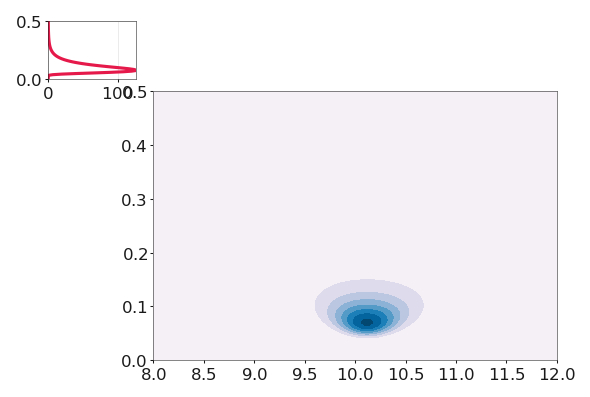

In [31]:
# exercise 2:

towerheights = np.array([56, 40, 23, 70, 22])
d_obs = np.array([3.3, 2.75, 2.2, 3.8, 2])
sigma_d = 0.1


def forward_model(m):
    return np.sqrt(2 * towerheights / m[0])


def rho_m(m):
    if m[1] <= 0:
        return 0
    pg = ((m[0] >= 5) & (m[0] <= 15)) * 1.0
    psigma = norm(np.log(sigma_d), 1).pdf(np.log(m[1]))
    return pg * psigma


# def rho_d(d):
# does not exist if we treat d_obs
# as an exact outcome of a stochastic process. (or it is a delta function in d-space)


def likelihood(m):
    if m[1] == 0:
        return 0
    p = norm(d_obs, m[1]).pdf(forward_model(m))
    return np.prod(p)


g = np.linspace(8, 12, 100)
sigma = np.linspace(0, 0.5, 101)
m0, m1 = np.meshgrid(g, sigma)

prior_m = np.empty_like(m0)
L_m = np.empty_like(m0)
for r in range(m0.shape[0]):
    for c in range(m0.shape[1]):
        curm = np.array([m0[r, c], m1[r, c]])
        prior_m[r, c] = rho_m(curm)
        L_m[r, c] = likelihood(curm)
post_m = prior_m * L_m

P = post_m  # plot this one
Pg = np.trapz(P, sigma, axis=0)
Psigma = np.trapz(P, g, axis=1)
plt.subplot2grid([5, 5], loc=[1, 1], rowspan=4, colspan=4)
plt.contourf(m0, m1, P)
plt.subplot2grid([5, 5], loc=[0, 0])
plt.plot(Psigma, sigma)
plt.subplot2grid([5, 5], loc=[5, 0])
plt.plot(Psigma, sigma)


# ax = plt.subplot_mosaic("AABBCCD")
# plt.sca(ax["A"])
# plt.contourf(m0, m1, prior_m)
# plt.sca(ax["B"])
# plt.contourf(m0, m1, L_m)
# plt.sca(ax["C"])
# plt.contourf(m0, m1, post_m)

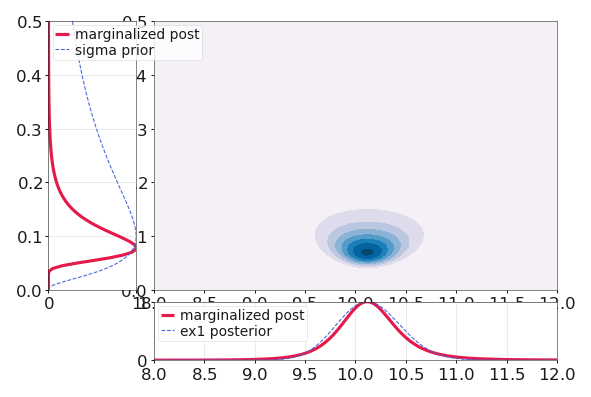

In [ ]:
P = post_m  # plot this one
Pg = np.trapz(P, sigma, axis=0)
Psigma = np.trapz(P, g, axis=1)
plt.subplot2grid([5, 5], loc=[0, 1], rowspan=4, colspan=4)
plt.contourf(m0, m1, P)
plt.subplot2grid([5, 5], loc=[0, 0], rowspan=4)
plt.plot(Psigma / np.max(Psigma), sigma, label="marginalized post")
sigmaprior = np.trapz(prior_m, g, axis=1)
plt.plot(sigmaprior / np.max(sigmaprior), sigma, "--", lw=0.5, label="sigma prior")
plt.legend()
plt.subplot2grid([5, 5], loc=[4, 1], colspan=4)
plt.plot(g, Pg / np.max(Pg), label="marginalized post")
plt.plot(ex1result[0], ex1result[1] / np.max(ex1result[1]), "--", lw=0.5, label="ex1 posterior")
plt.xlim([g[0], g[-1]])
plt.legend()

100